In [5]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

import os, sys
from pprint import pprint
sys.path.append('../')
sys.path.append('.')
import modules

In [2]:
# NB: this is based on paths looking like:
# ../output/alaska/compute-roce/gnu-openmpi/IMB_PingPong/rfm_IMB_PingPong_job.out 
# ../perflogs/alaska/compute-roce/gnu-openmpi/IMB_PingPong/IMB_PingPong.log

In [6]:
# find and load output files:
run_outputs = modules.utils.find_run_outputs('../output', 'IMB')

# load results using the same function that we use for reframe performance tests:
results = []
for path in run_outputs:
    result = reframe_imb.read_imb_out(path)
    results.append(result)

# Group results by *testname*
test_results = modules.utils.group_by(results, lambda x: x['meta']['testname'])

print('loaded %s output files from %i tests' % (len(results), len(test_results)))
for test, cases in test_results.items():
    print(test, ':')
    for c in cases:
        print('  ', c['meta']['path'])
#         print('    ',c['meta']['environ'])
#         print('    ',c['meta']['partition'])

NameError: name 'reframe_imb' is not defined

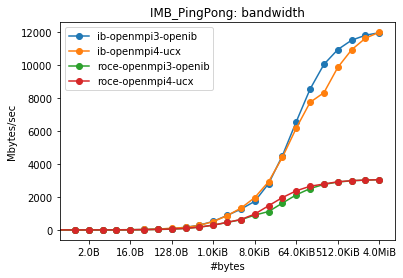

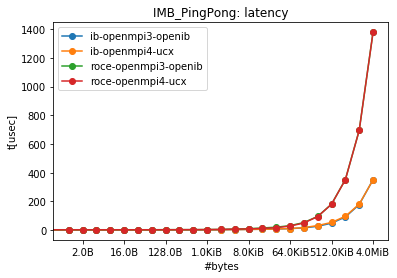

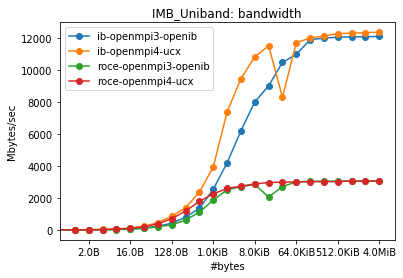

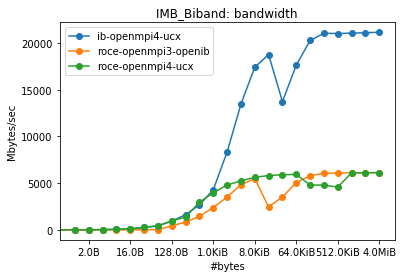

In [4]:
# Plotting:

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker

PLOTS = [
    {
        'test':'IMB_PingPong',
        'xaxis':'#bytes',
        'yaxis':'Mbytes/sec',
        'metric':'bandwidth',
    },
    {
        'test':'IMB_PingPong',
        'xaxis':'#bytes',
        'yaxis':'t[usec]',
        'metric':'latency',
    },
    {
        'test':'IMB_Uniband',
        'xaxis':'#bytes',
        'yaxis':'Mbytes/sec',
        'metric':'bandwidth',
    },
    {
        'test':'IMB_Biband',
        'xaxis':'#bytes',
        'yaxis':'Mbytes/sec',
        'metric':'bandwidth',
    },   
]

for plot in PLOTS:
    
    cases = test_results[plot['test']]
    
    # add a label to each case based on unique metadata:
    common, differences = modules.utils.diff_meta(cases)
    for ix, unique_meta in enumerate(differences):
        cases[ix]['label'] = '-'.join(list(unique_meta.values()))
    
    # sort cases by label:
    cases = sorted(cases, key=lambda c: c['label'])
    
    plt.figure()
    for ix, case in enumerate(cases):
        
        data = case['data'] # TODO: change this cope with benchmark name in output instead of fixed "data" key
        
        #plt.plot(data[plot['xaxis']], data[plot['yaxis']], 'o-', label=label)
        plt.plot(data[plot['xaxis']], data[plot['yaxis']], 'o-', label=case['label'])
        plt.grid()
        plt.title('%s: %s' % (plot['test'], plot['metric']))
        plt.legend()
        plt.grid()
        ax = plt.gca()
        ax.set_xscale('log', basex=2)
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: modules.utils.sizeof_fmt(x)))
        plt.xlabel(plot['xaxis'])
        plt.ylabel(plot['yaxis'])
    

In [5]:
# example of loading test objects - don't actually need this yet

# def get_tests(module):
#     tests = []
#     for name in dir(module):
#         obj = getattr(module, name)
#         if isinstance(obj, reframe.core.meta.RegressionTestMeta):
#             tests.append(obj)
#     return tests
# testobjs = get_tests(reframe_imb)
# print(testobjs)

In [2]:
# Load performance records
perf_records = modules.utils.load_perf_logs('../perflogs', 'IMB', '.log')
print('loaded %s performance records' % len(perf_records))

loaded 36 performance records


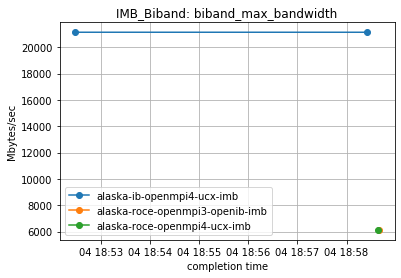

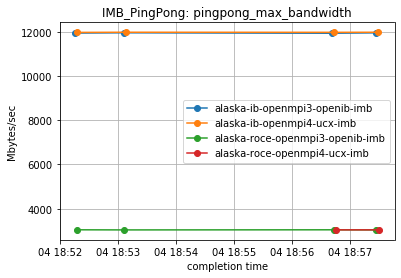

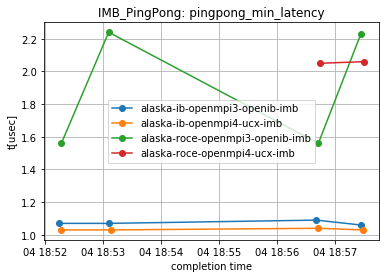

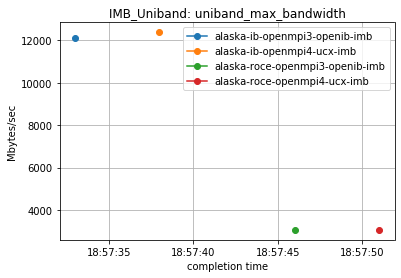

In [3]:
# Plot performance history:
modules.utils.plot_perf_history(perf_records)